<center>
    <h1> Introduction to PyTorch </h1>
    <h2> Part One: The basics of working with arrays / tensors </h2>
    <h3> Elliott Forney - 2019 </h3>
</center>

Prerequisites:
1.  Intermediate understanding of Python
1.  Intermediate understanding of NumPy and Matplotlib
1.  Beginner understanding of Neural Networks and Backpropagation
1.  Familarity with GPU acceleration

The goal of this tutorial is to help developers and data scientists who are already familar with NumPy and Matplotlib to gain introduction experience with PyTorch, including basic array / tensor operations and performing computations using GPU acceleration.  Toward the end of this tutorial, we will also demonstrate the basics of how to use automatic differentiation in PyTorch and hint toward how this can be used to train neural nets.  In part two of this tutorial series, we will go more into depth on the topic of artificial neural networks and show how to actually build and train neural nets in PyTorch.

## Imports

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

import torch as th
import numpy as np

## Arrary (Tensor) creation

mimics much of the NumPy API

In [62]:
th.arange(10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
th.linspace(-3.14, 3.14, 8)

tensor([-3.1400, -2.2429, -1.3457, -0.4486,  0.4486,  1.3457,  2.2429,  3.1400])

In [49]:
th.zeros((10, 4))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [50]:
th.ones((10, 4))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [51]:
th.eye(4)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [52]:
x = th.rand((10, 4))
x

tensor([[0.6076, 0.8826, 0.5247, 0.6209],
        [0.3915, 0.2547, 0.4766, 0.3385],
        [0.3191, 0.8837, 0.5767, 0.6604],
        [0.6968, 0.3658, 0.6687, 0.7595],
        [0.4958, 0.4026, 0.7322, 0.1321],
        [0.2934, 0.8609, 0.3472, 0.4591],
        [0.3941, 0.2799, 0.4258, 0.9946],
        [0.8225, 0.0785, 0.7781, 0.8757],
        [0.4566, 0.4488, 0.5636, 0.6562],
        [0.6776, 0.3139, 0.5799, 0.9513]])

torch arrays have a dtype, just like numpy, but th.dtype

default is th.float32 - complex types do not currently have full support

In [68]:
x.dtype

torch.float32

## Basic mathematical operations

Also many of the mathematical operations found in NumPy

`.sum`, `.mean`, et cetra.

Note that there are some subtle differences with NumPy.  For example `dim=` instead of `axis=` and `th.rand` versus `np.random.random`.

In [73]:
x.sum(0)

tensor([5.1549, 4.7714, 5.6735, 6.4482])

In [55]:
x.sum(1)

tensor([2.6358, 1.4613, 2.4399, 2.4908, 1.7626, 1.9606, 2.0944, 2.5548, 2.1252,
        2.5227])

In [84]:
x.mean()

tensor(0.5512)

In [83]:
th.mean(x)

tensor(0.5512)

In [74]:
10 * x.mean(0)

tensor([5.1549, 4.7714, 5.6735, 6.4482])

In [78]:
print(x.shape)
print(x.t().shape)

torch.Size([10, 4])
torch.Size([4, 10])


In [80]:
th.matmul(x.t(), x)

tensor([[2.9411, 2.2175, 3.0783, 3.5063],
        [2.2175, 3.0463, 2.5476, 2.8843],
        [3.0783, 2.5476, 3.3796, 3.6583],
        [3.5063, 2.8843, 3.6583, 4.8328]])

In [79]:
x.t() @ x

tensor([[2.9411, 2.2175, 3.0783, 3.5063],
        [2.2175, 3.0463, 2.5476, 2.8843],
        [3.0783, 2.5476, 3.3796, 3.6583],
        [3.5063, 2.8843, 3.6583, 4.8328]])

reshaping is similar to numpy, can us `-1` and `None` in a similar way.

Note that we use `.permute` to swap axes instead of `.swapaxes`

In [57]:
x.reshape((2, 5, 4))

tensor([[[0.6076, 0.8826, 0.5247, 0.6209],
         [0.3915, 0.2547, 0.4766, 0.3385],
         [0.3191, 0.8837, 0.5767, 0.6604],
         [0.6968, 0.3658, 0.6687, 0.7595],
         [0.4958, 0.4026, 0.7322, 0.1321]],

        [[0.2934, 0.8609, 0.3472, 0.4591],
         [0.3941, 0.2799, 0.4258, 0.9946],
         [0.8225, 0.0785, 0.7781, 0.8757],
         [0.4566, 0.4488, 0.5636, 0.6562],
         [0.6776, 0.3139, 0.5799, 0.9513]]])

Need to describe slicing

In [70]:
x[::3, -1]

tensor([0.6209, 0.7595, 0.9946, 0.9513])

PyTorch provides easy integration with NumPy.  This, in turn, also provides integration with many other libraries that rely heavily on NumPy, e.g., Matplotlib and SciPy.

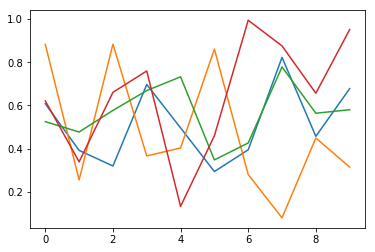

In [58]:
plt.plot(x.numpy());

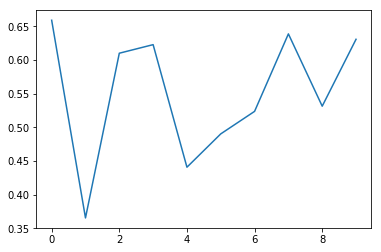

In [59]:
plt.plot(x.mean(1).numpy());

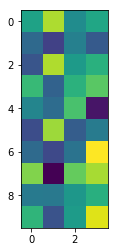

In [72]:
plt.imshow(x.numpy());

In [60]:
a_np = 0.25 * np.ones((2, 2))
print("numpy:")
print(a_np)
print(type(a_np))
print(a_np.dtype)
print()

a_th = th.as_tensor(a_np)
print("torch:")
print(a_th)
print(type(a_th))
print(a_th.dtype)

numpy:
[[0.25 0.25]
 [0.25 0.25]]
<class 'numpy.ndarray'>
float64

torch:
tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]], dtype=torch.float64)
<class 'torch.Tensor'>
torch.float64


## Working with Tensors on a GPU

In [85]:
x.cuda()

AssertionError: Torch not compiled with CUDA enabled

## Finding gradients with automagic differentiation

In [204]:
x.shape

torch.Size([10, 4])

In [205]:
w = th.empty((4, 2), requires_grad=True)
b = th.empty((1, 2), requires_grad=True)
x.shape, w.shape, b.shape

(torch.Size([10, 4]), torch.Size([4, 2]), torch.Size([1, 2]))

In [206]:
th.nn.init.xavier_uniform_(w)

tensor([[ 0.1748, -0.7379],
        [-0.0502, -0.4070],
        [ 0.2809, -0.8751],
        [-0.9247,  0.1484]], requires_grad=True)

In [207]:
th.nn.init.xavier_uniform_(b)

tensor([[ 0.2777, -1.4100]], requires_grad=True)

In [227]:
#g = th.cat((th.arange(10, dtype=th.float32)[:, None], th.rand(10, 1)), dim=1)
g = th.rand((10, 2))
g

tensor([[0.4878, 0.8002],
        [0.5381, 0.6604],
        [0.0656, 0.1974],
        [0.2808, 0.9093],
        [0.8450, 0.9203],
        [0.4423, 0.3938],
        [0.3487, 0.8110],
        [0.2671, 0.1890],
        [0.8690, 0.3377],
        [0.1008, 0.5175]])

In [244]:
y = x @ w + b

In [245]:
y.shape

torch.Size([10, 2])

In [253]:
if w.grad is not None:
    w.grad.zero_()

if b.grad is not None:
    b.grad.zero_()

In [254]:
loss = th.mean((y - g)**2)
loss

tensor(4.5888, grad_fn=<MeanBackward0>)

In [255]:
loss.backward(retain_graph=True)

In [256]:
w.grad

tensor([[-0.2638, -1.5508],
        [-0.2381, -1.4052],
        [-0.2863, -1.6972],
        [-0.3486, -1.8867]])

In [257]:
b.grad

tensor([[-0.5176, -2.9590]])